Kaggle problem for house prices

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 

In [2]:
df_train=pd.read_csv(r"D:\Kaggle\train.csv")
df_test=pd.read_csv(r"D:\Kaggle\test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.shape

(1460, 81)

In [6]:
missing=df_train.isnull().sum()
missing_df=(pd.DataFrame(missing,columns=['missing_values']))
missing_df[missing_df['missing_values']>0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
missing_df[missing_df['missing_values']>0]

,missing_values
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Creating the new column garageage 

In [9]:
def garageage(x):
    if(x['GarageYrBlt'] is  None):
        return 0
    else:
        return x['YrSold']-x['GarageYrBlt']
    


df_train['garageAge']=df_train.apply(garageage,axis=1)

df_train['garageAge']=df_train['garageAge'].fillna(value=0)



In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,garageAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,8.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8.0


Creating two new columns first is how old is the house and teh other whether it is remodelled or not

In [11]:
def AgeOfHouse(x):
    return x['YrSold'] -x['YearBuilt']

df_train['NoOfYears']=df_train.apply(AgeOfHouse,axis=1)
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,garageAge,NoOfYears
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,5.0,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,31.0,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,7.0,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,8.0,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,8.0,8


In [12]:
def remodelled(x):
    if(x['YearBuilt']==x['YearRemodAdd']):
        return 0
    else:
        return 1

    
df_train['RemodelledorNot']=df_train.apply(remodelled,axis=1)

Dropping the columns 'YearBuilt' ,'YearRemodAdd' ,'GarageYrBlt' and 'YrSold'

In [13]:
df_train.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],inplace=True)

In [14]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,garageAge,NoOfYears,RemodelledorNot
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,WD,Normal,208500,5.0,5,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,WD,Normal,181500,31.0,31,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,WD,Normal,223500,7.0,7,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,WD,Abnorml,140000,8.0,91,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,WD,Normal,250000,8.0,8,0


In this use case we have many vissing values,but from the data description we can infer the values.

In [18]:
column_zerotobereplaced=['LotFrontage','MasVnrArea']
column_Nonetobereplaced=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','GarageType']
column_modetobereplaced=['Electrical']


In [19]:
for col in column_Nonetobereplaced:
    
    df_train[col].fillna(value='None',inplace=True)

for col in column_zerotobereplaced:
    
    df_train[col].fillna(value='0',inplace=True)
    
for col in column_modetobereplaced:
    df_train[col].fillna(value=df_train[col].mode()[0],inplace=True)



In [20]:
missing=df_train.isnull().sum()
missing_df=(pd.DataFrame(missing,columns=['missing_values']))
missing_df[missing_df['missing_values']>0].index

Index([], dtype='object')

skewness = 0 : normally distributed.

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution.

In [31]:
columns=df_train.columns
print(columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id                 1460 non-null int64
MSSubClass         1460 non-null int64
MSZoning           1460 non-null object
LotFrontage        1460 non-null object
LotArea            1460 non-null int64
Street             1460 non-null object
Alley              1460 non-null object
LotShape           1460 non-null object
LandContour        1460 non-null object
Utilities          1460 non-null object
LotConfig          1460 non-null object
LandSlope          1460 non-null object
Neighborhood       1460 non-null object
Condition1         1460 non-null object
Condition2         1460 non-null object
BldgType           1460 non-null object
HouseStyle         1460 non-null object
OverallQual        1460 non-null int64
OverallCond        1460 non-null int64
RoofStyle          1460 non-null object
RoofMatl           1460 non-null object
Exterior1st        1460 non-null object
Exterior2nd       

0.6953165801908057


C:\Users\vkatepally\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


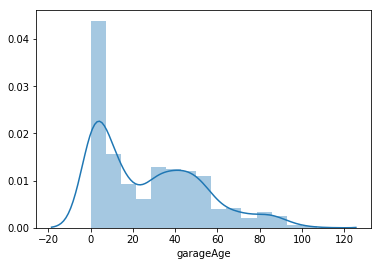

In [30]:
print(df_train['garageAge'].skew())
sns.distplot(df_train['garageAge'])

C:\Users\vkatepally\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


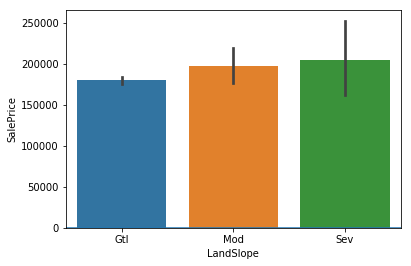

In [12]:
#g=sns.FacetGrid(data=df_train,col='HouseStyle',hue='SalePrice')
#g.map(sns.barplot(),)
sns.distplot(df_train['SalePrice'],kde=True)
#plt.show()
sns.barplot(x=df_train['LandSlope'],y=df_train['SalePrice'])
plt.show()

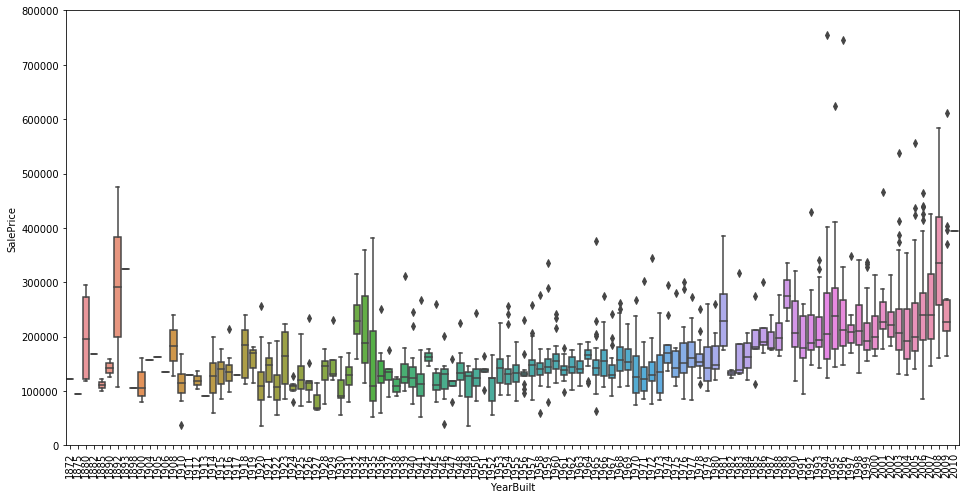

In [13]:
var = 'YearBuilt'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df_train[var], y=df_train["SalePrice"])
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

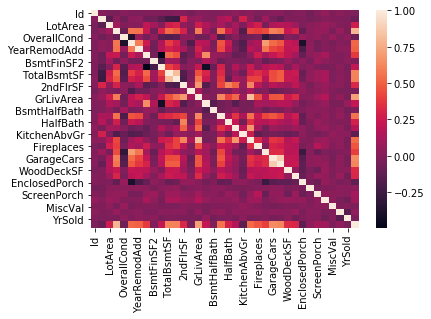

In [14]:
sns.heatmap(df_train.corr())

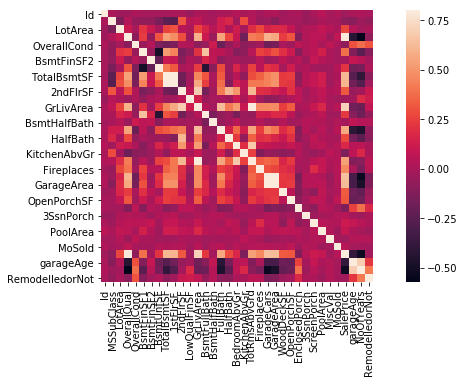

In [22]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

In [16]:
print(df_train.corr().shape)

(36, 36)


In [17]:
sp=pd.get_dummies(df_train)
sp.shape
print(sp.head())

   Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            SaleType_ConLw  \
0         706           0        150          ...                         0   
1         978           0        284          ...                         0   
2         486           0        434          ...                         0   
3         216           0        540          ...                         0   
4         655           0        490          ...                         0   

   SaleType_New  SaleType_Oth  SaleTyp

principal component analysis

In [18]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 741 entries, Id to SaleCondition_Partial
dtypes: float64(1), int64(35), uint8(705)
memory usage: 1.4 MB


In [19]:
float_columns=[]


for col in sp.columns:
    if(sp[col].dtypes=='float64'):
        float_columns.append(col)
#print(float_columns)

#print(sp['GarageYrBlt'].value_counts())

sp.GarageYrBlt=sp.GarageYrBlt.astype('str')

print((sp['GarageYrBlt'].dtypes))

#sns.boxplot(sp['GarageYrBlt'])
#plt.show()
#sns.kdeplot(sp['GarageYrBlt'])
#plt.show()
    

object


In [20]:
y=sp['SalePrice']

In [21]:
sp.drop(columns=['Id','SalePrice'],inplace=True)

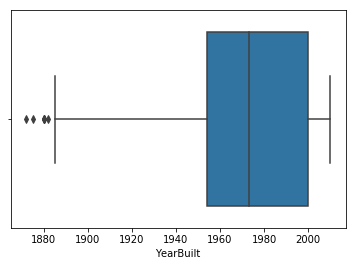

C:\Users\vkatepally\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


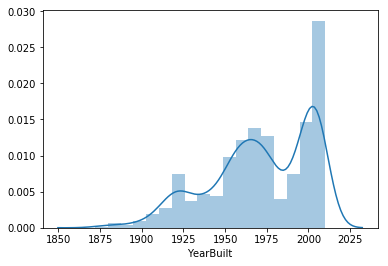

In [22]:
sns.boxplot(sp['YearBuilt'])
plt.show()
sns.distplot(sp['YearBuilt'])
plt.show()

In [23]:
int_columns=[]
for col in sp.columns:
    if(sp[col].dtypes=='int64'):
        int_columns.append(col)
        
print(int_columns)        

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [24]:
columns_tobe_Changed_toObject=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','PoolArea','MoSold']


In [25]:
print(len(columns_tobe_Changed_toObject))
for col in columns_tobe_Changed_toObject:
    sp[col]=sp[col].astype('object')

14


In [26]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 739 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(19), object(15), uint8(705)
memory usage: 1.4+ MB


In [27]:
sp=pd.get_dummies(data=sp)
sp.info()
print(sp.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 922 entries, LotArea to MoSold_12
dtypes: int64(19), uint8(903)
memory usage: 1.5 MB
(1460, 922)


In [39]:
sc=StandardScaler()
scaled_sp=sc.fit_transform(sp)


In [41]:
(scaled_sp.shape)

(1460, 922)

In [105]:
X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [104]:
df=sp

y=df['SalePrice']

X=df.drop(columns=['SalePrice','id'])

int_columns=[]

X.info()

for i in X.columns:
    
    if((X[i].dtypes=='int64')):
        int_columns.append(i)
        
print(int_columns)


KeyError: "['id'] not found in axis"

In [ ]:
#PCA


pca=PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("No of independent variables")

plt.ylabel("Variance Component")